## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Data Cleaning

In [2]:
df = pd.read_csv("Data/nba_draft_combine_all_years.csv",index_col=False)
df.head(2)

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.5,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.0,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18


In [3]:
df = df.drop(columns=['Unnamed: 0',"Hand (Length)", "Hand (Width)"])
df.head(2)
##df.shape

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.5,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.0,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,9.0,11.15,3.18


In [4]:
##Substitute NAN Values with Average data of field
df["Height (With Shoes)"].fillna(78.8, inplace=True)
df["Vertical (Max)"].fillna(35.2, inplace=True)
df["Vertical (Max Reach)"].fillna(138, inplace=True)
df["Vertical (No Step)"].fillna(29.6, inplace=True)
df["Vertical (No Step Reach)"].fillna(132.6, inplace=True)
df["Weight"].fillna(214.6, inplace=True)
df["Body Fat"].fillna(7.2, inplace=True)
df["Bench"].fillna(10.2, inplace=True)
df["Agility"].fillna(11.3, inplace=True)
df["Sprint"].fillna(3.3, inplace=True)
df["Draft pick"].fillna(0, inplace=True)

In [5]:
df = df.dropna(how="any")
df.shape

(517, 16)

In [6]:
def draft_output(row):
    if row["Draft pick"] > 0:
        val = 1
    else:
        val = 0
    return val;

In [7]:
df["Draft_Output"] = df.apply(draft_output, axis=1)

In [8]:
df.head()
df["Draft_Output"].value_counts()

1    384
0    133
Name: Draft_Output, dtype: int64

In [9]:
X = df.drop(columns = ["Draft_Output", "Draft pick", "Player"], axis = 1) 
y = df["Draft_Output"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [11]:
X.shape

(517, 14)

In [12]:
y.shape

(517,)

In [13]:
X_train.shape

(413, 14)

In [14]:
y_train.shape

(413,)

## Logistic Regression

In [15]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
classifier = model.fit(X_train, y_train)
print("Training Score : ", classifier.score(X_train, y_train))
print("Testing Score : ", classifier.score(X_test, y_test))

Training Score :  0.738498789346247
Testing Score :  0.75


In [17]:
predictions = classifier.predict(X_test)

In [18]:
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
dictionary = {"Predictions" : predictions, "Actuals": y_test}

In [20]:
predict_df = pd.DataFrame(dictionary).reset_index(drop=True)

In [21]:
predict_df.head(10)

,Predictions,Actuals
0,1,1
1,1,0
2,1,0
3,1,1
4,1,0
5,1,1
6,0,0
7,1,0
8,1,0
9,1,1


## Random Forest

In [22]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print("Training RandomForest Score : ",rf.score(X_train, y_train))
print("Testing RandomForest Score : ",rf.score(X_test, y_test))

Training RandomForest Score :  1.0
Testing RandomForest Score :  0.75


In [23]:
predictions = rf.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [24]:
rf_predictions_df = pd.DataFrame({"Predictions": predictions, "Actuals": y_test})

In [25]:
rf_predictions_df.head()

,Predictions,Actuals
304,1,1
501,0,0
441,1,0
153,1,1
503,0,0


## Random Forest with different n_estimators

In [48]:
rf2 = RandomForestClassifier(n_estimators= 50)
rf2 = rf2.fit(X_train, y_train)
print("Training Score : ", rf2.score(X_train, y_train))
print("Testing Score : ", rf2.score(X_test, y_test))

Training Score :  1.0
Testing Score :  0.7211538461538461


In [50]:
predictions = rf2.predict(X_test)

In [53]:
rf2_predictions_df = pd.DataFrame({"Predictions": predictions, "Actuals": y_test})
rf2_predictions_df.head()

,Predictions,Actuals
304,1,1
501,0,0
441,1,0
153,1,1
503,0,0


## K Neighbors Model

In [54]:
X_train = X_train.values

In [55]:
X_Scaler = StandardScaler().fit(X_train.reshape(-1,1))

In [56]:
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [57]:
train_scores = []
test_scores=[]
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.625
k: 3, Train/Test Score: 0.814/0.654
k: 5, Train/Test Score: 0.782/0.673
k: 7, Train/Test Score: 0.787/0.673
k: 9, Train/Test Score: 0.777/0.692
k: 11, Train/Test Score: 0.746/0.692
k: 13, Train/Test Score: 0.770/0.683
k: 15, Train/Test Score: 0.775/0.712
k: 17, Train/Test Score: 0.777/0.702
k: 19, Train/Test Score: 0.772/0.731
k: 21, Train/Test Score: 0.751/0.731
k: 23, Train/Test Score: 0.746/0.712
k: 25, Train/Test Score: 0.751/0.721
k: 27, Train/Test Score: 0.746/0.721
k: 29, Train/Test Score: 0.748/0.740


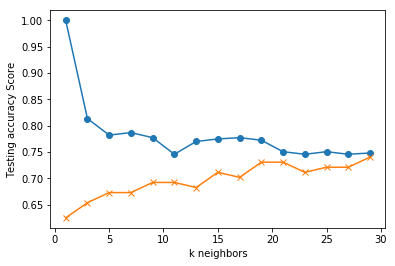

In [58]:
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [59]:
knn= KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

In [60]:
predictions = knn.predict(X_test_scaled)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [61]:
knn_predictions_df = pd.DataFrame({"Predictions": predictions, "Actuals": y_test})

In [62]:
knn_predictions_df

,Predictions,Actuals
304,1,1
501,1,0
441,1,0
153,1,1
503,1,0
131,1,1
204,1,0
512,1,0
325,1,0
247,1,1


## Conclusion:
### For this dataset; the best model is RandomForest because its predictions are the most accurate than the other 2 models

### However; this dataset is not the best for our purposes because the score is not so close to 1.0

### We're gonna try apply the models to different datasets where the categories of Drafted and Undrafted is more unbiased